# Section 5 - Exercise 1: Homework Solutions

This notebook contains the solutions to the homework problems from Exercise 1.

## Setup

This cell imports necessary libraries and loads the Replicate API token from the `.env` file located in the project root (`genai-course`). Ensure the `.env` file exists and contains your valid token.

In [1]:
# Install required libraries (if you haven't already)
# Uncomment the line below if you need to install
# !pip install replicate python-dotenv requests ipython

import replicate
import os
from dotenv import load_dotenv
import requests
import time
from IPython.display import Image, display # To display images in the notebook

# Load environment variables from .env file (searches current dir and parents)
load_dotenv()

api_token = os.getenv("REPLICATE_API_KEY")
os.environ["REPLICATE_API_TOKEN"] = api_token # The replicate library uses this env var

if not api_token:
    print("⚠️ Warning: REPLICATE_API_TOKEN not found.")
    print("   Please ensure a .env file exists in the project root directory")
    print("   with the line: REPLICATE_API_TOKEN=your_actual_token")
else:
    print("✅ Replicate API Token loaded successfully.")

✅ Replicate API Token loaded successfully.


---

### Solution for Task 1: Experiment with Parameters

**Task:** Modify a parameter (e.g., `num_inference_steps`) and observe the change.


--- Homework Task 1: Experimenting with num_inference_steps ---
Running with num_inference_steps = 50...
Output saved to: ../images/homework_task1_skateboarding_steps50.webp


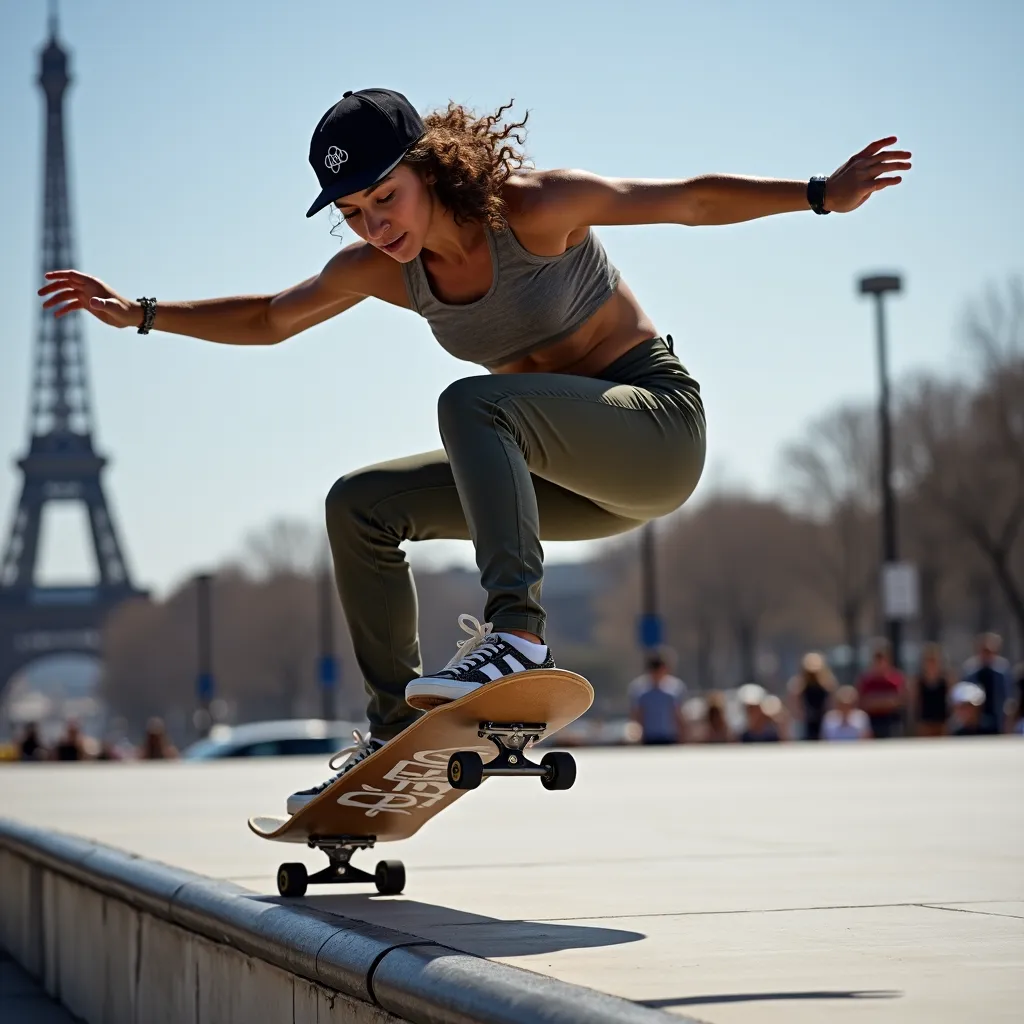

Observation: Increasing inference steps might lead to a more detailed or refined image, but also takes longer to generate.
Compare this output to the corresponding image generated in the exercise notebook (if you ran it).


In [4]:
# Ensure the API token is loaded before running this
if api_token:
    print("\n--- Homework Task 1: Experimenting with num_inference_steps ---")

    # Using the skateboarding prompt from the exercise, but increasing inference steps
    input_task1 = {
        "seed": 17536, # Keep seed the same for comparison if desired
        "prompt": "womens street skateboarding final in Paris Olympics 2024",
        "go_fast": True,
        "guidance": 3.5,
        "num_outputs": 1,
        "aspect_ratio": "1:1",
        "output_format": "webp",
        "output_quality": 80,
        "prompt_strength": 0.8,
        "num_inference_steps": 50 # Increased from 28 in the exercise example
    }

    print(f"Running with num_inference_steps = {input_task1['num_inference_steps']}...")

    try:
        output_task1 = replicate.run(
            "black-forest-labs/flux-dev", # Using flux-dev as in the exercise
            input=input_task1
        )

        # Save and display the output
        output_filename_task1 = "../images/homework_task1_skateboarding_steps50.webp"
        for index, item in enumerate(output_task1):
             # Download the image data from the URL
            response = requests.get(item)
            response.raise_for_status() # Raise an exception for bad status codes
            # Use a unique name to avoid overwriting previous outputs
            with open(output_filename_task1, "wb") as file:
                file.write(response.content)
            print(f"Output saved to: {output_filename_task1}")
            display(Image(filename=output_filename_task1))

        print("Observation: Increasing inference steps might lead to a more detailed or refined image, but also takes longer to generate.")
        print("Compare this output to the corresponding image generated in the exercise notebook (if you ran it).")

    except Exception as e:
        print(f"An error occurred during Task 1 execution: {e}")
        print("Ensure your REPLICATE_API_TOKEN is valid.")
else:
    print("Skipping Task 1 execution as API token is missing.")

### Solution for Task 2: Try a Different Prompt Style

**Task:** Generate an image using a completely different prompt style or subject.


--- Homework Task 2: Trying a Different Prompt Style ---
Running with prompt: "a cute tabby cat wearing a tiny wizard hat, sitting on a stack of old books, digital painting, fantasy art style"
Output saved to: homework_task2_wizard_cat.png


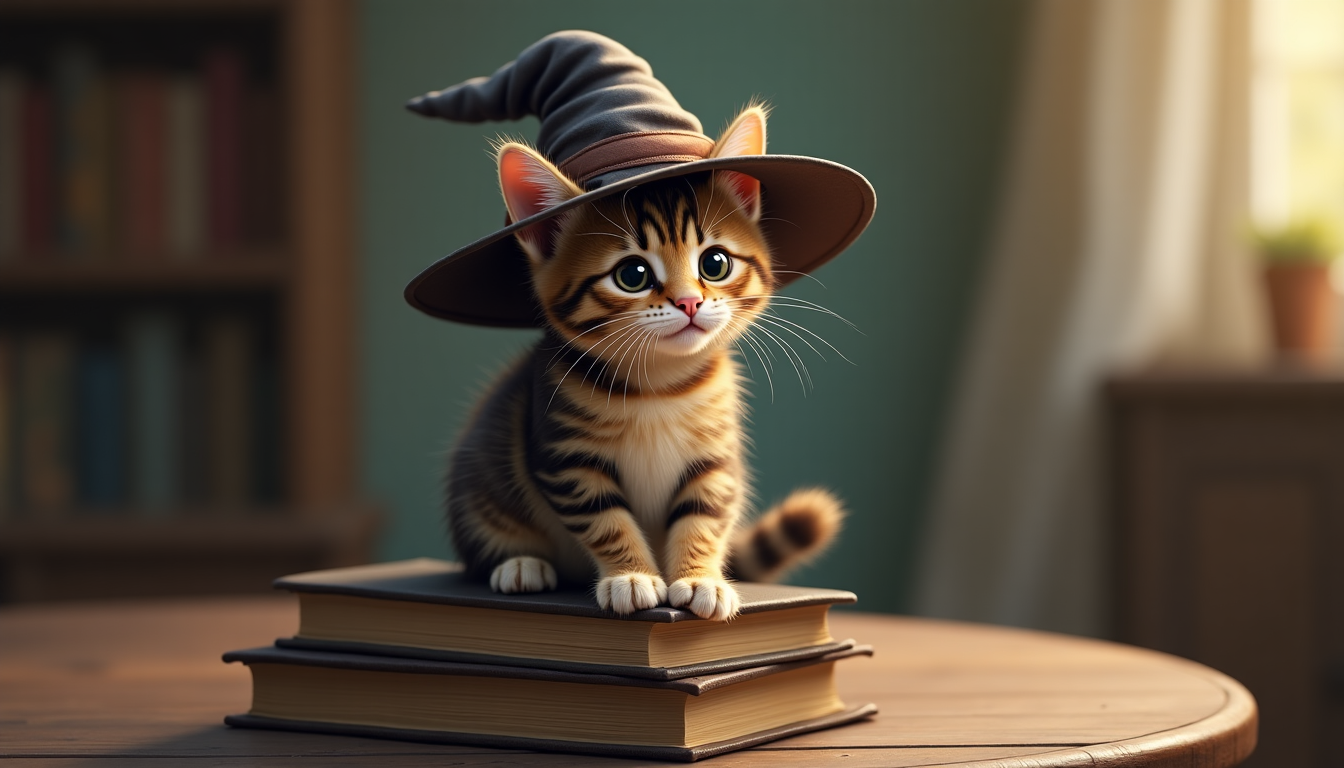

Observation: The model generated an image based on the new fantasy art prompt.


In [ ]:
# Ensure the API token is loaded before running this
if api_token:
    print("\n--- Homework Task 2: Trying a Different Prompt Style ---")

    input_task2 = {
        "prompt": "a cute tabby cat wearing a tiny wizard hat, sitting on a stack of old books, digital painting, fantasy art style",
        "guidance": 4.0, # Slightly adjusted guidance
        "num_outputs": 1,
        "aspect_ratio": "16:9", # Changed aspect ratio
        "output_format": "png", # Changed format
        "num_inference_steps": 35 # Adjusted steps
        # Add other parameters as desired, like seed for reproducibility
        # "seed": 12345
    }

    print(f"Running with prompt: \"{input_task2['prompt']}\"")

    try:
        output_task2 = replicate.run(
            "black-forest-labs/flux-dev",
            input=input_task2
        )

        # Save and display the output
        output_filename_task2 = "../images/homework_task2_wizard_cat.png"
        for index, item in enumerate(output_task2):
            # Download the image data from the URL
            response = requests.get(item)
            response.raise_for_status() # Raise an exception for bad status codes
            with open(output_filename_task2, "wb") as file:
                file.write(response.content)
            print(f"Output saved to: {output_filename_task2}")
            display(Image(filename=output_filename_task2))

        print("Observation: The model generated an image based on the new fantasy art prompt.")

    except Exception as e:
        print(f"An error occurred during Task 2 execution: {e}")
        print("Ensure your REPLICATE_API_TOKEN is valid.")
else:
    print("Skipping Task 2 execution as API token is missing.")

### Solution for Task 3 (Optional): Error Handling

**Task:** Observe the error when using an invalid API token.

If you provide an invalid `REPLICATE_API_TOKEN` (e.g., an empty string, `"invalid_token"`, or just remove the line) in your `.env` file and re-run the setup cell, the warning message "⚠️ Warning: REPLICATE_API_TOKEN not found." should appear (or it might load an empty string without warning depending on your `.env` setup).

When you then try to run `replicate.run()` in the solution cells above (Task 1 or Task 2), you will likely encounter an error. The specific error message might vary slightly, but it will typically be an `replicate.exceptions.ReplicateError` or an HTTP error (like a 401 Unauthorized) indicating that the authentication failed.

**Example Error Message (might differ):**
```
replicate.exceptions.ReplicateError: Incorrect API token provided. Your API token should start with 'r8_'. Get your token from https://replicate.com/account
```
or
```
requests.exceptions.HTTPError: 401 Client Error: Unauthorized for url: https://api.replicate.com/v1/predictions
```

**Remember to restore your valid API token in the `.env` file after testing this.**